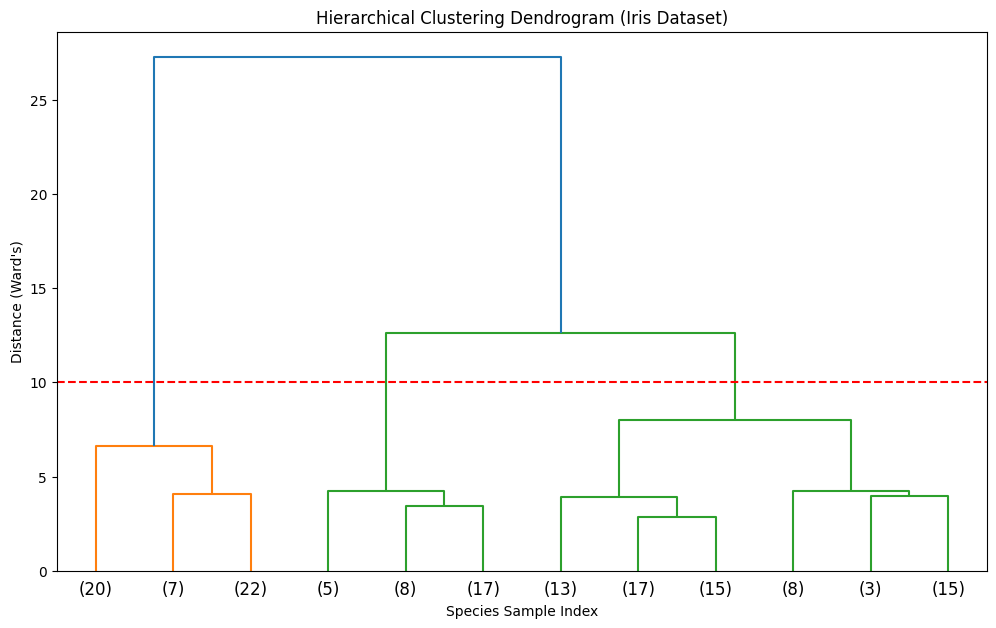

Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [44]:
'''
   perfromed agglomerative  hierarchical clustering 
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 1. LOAD DATA
iris = datasets.load_iris()
X = iris.data

species_names = iris.target_names[iris.target]

# 2. PRE-PROCESSING 
# We scale because "Petal Length" is 10x larger than "Petal Width"
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PERFORM CLUSTERING
# 'ward' minimizes variance; 'euclidean' is the straight-line distance
Z = linkage(X_scaled, method='ward', metric='euclidean')

# 4. VISUALIZATION (The Dendrogram)
plt.figure(figsize=(12, 7))
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Species Sample Index')
plt.ylabel('Distance (Ward\'s)')

# truncate_mode='lastp' collapses the tree so it shows only p no. of initial clusters (here p is set to 12)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only 12 clusters for clarity
    show_leaf_counts=True,  # numbers in brackets are the count of points in that cluster
    leaf_font_size=12.,
)

# Drawing a "Cut" line to decide on 3 clusters 
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

# 5. ASSIGNING CLUSTERS
# 't=3' means we want 3 clusters
clusters = fcluster(Z, t=3, criterion='maxclust')

# Let's see the first 10 results
print(f"Cluster assignments: {clusters[:150]}")

For n_clusters = 2, Silhouette Score is: 0.5770
For n_clusters = 3, Silhouette Score is: 0.4467
For n_clusters = 4, Silhouette Score is: 0.4006
For n_clusters = 5, Silhouette Score is: 0.3306


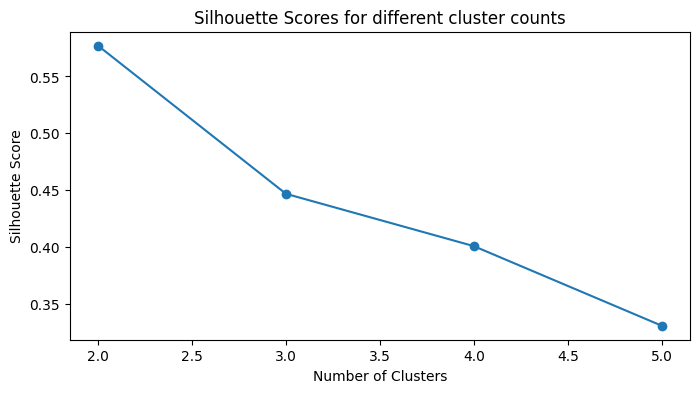

In [11]:
'''
here, previously i used 3 clusters because i knew the dataset, i were to rely on math, it provided 2 clusters to be the best solution, so proceed with keeping dataset in mind

'''

from sklearn.metrics import silhouette_score
scores = []
range_n_clusters = range(2, 6) 

for n in range_n_clusters:
    
    labels = fcluster(Z, t=n, criterion='maxclust')
    
    # Calculate and store the score
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f"For n_clusters = {n}, Silhouette Score is: {score:.4f}")


plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, scores, marker='o')
plt.title('Silhouette Scores for different cluster counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
# Compare our predicted 'clusters' with the actual 'target' species
comparison = pd.crosstab(iris.target, clusters, rownames=['Actual Species'], colnames=['Cluster ID'])
print("\n--- Performance Check ---")
print(comparison)


--- Performance Check ---
Cluster ID       1   2   3
Actual Species            
0               49   1   0
1                0  27  23
2                0   2  48


C:\Users\Admin\AppData\Local\Temp\ipykernel_2716\3684724687.py:21: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_features = linkage(dist_matrix, method='complete')


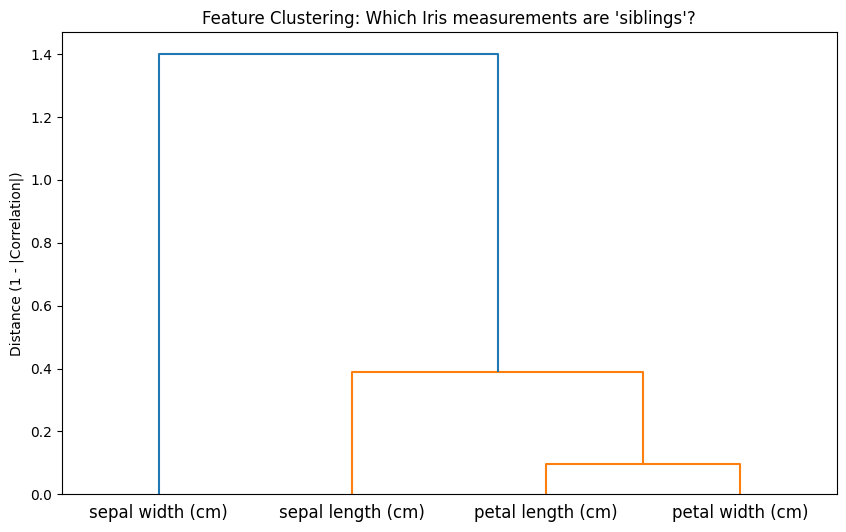

In [21]:
'''

here i performed feature clustering using agglomerative clustering, it focuses on features rather than target

'''

# We create 'df' here so the computer knows what it is!
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Calculate the correlation matrix
# This compares columns to each other
corr_matrix = df.corr()

# 3. Convert correlation to "Distance"
dist_matrix = 1 - abs(corr_matrix)

# 4. Perform Hierarchical Clustering on the FEATURES
Z_features = linkage(dist_matrix, method='complete')

# 5. Plot the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z_features, labels=df.columns, orientation='top')
plt.title("Feature Clustering: Which Iris measurements are 'siblings'?")
plt.ylabel("Distance (1 - |Correlation|)")
plt.show()

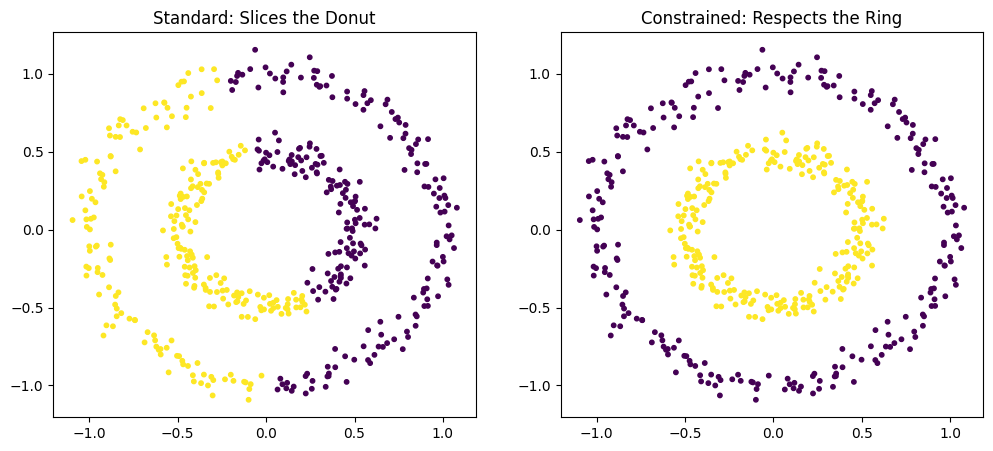

In [43]:
'''
  agglomerative clustering isConnectivity-Constrained, but here it is solved by  linkage='single'
 '''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# 1. Create 2 Concentric Circles (a small one inside a big one)
X,y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)


# 2. Clustering WITH ward
cluster_std = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_std = cluster_std.fit_predict(X)

# 3. Clustering WITH single 
cluster_const = AgglomerativeClustering(n_clusters=2, linkage='single')
labels_const = cluster_const.fit_predict(X)

# 4. Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[:, 0], X[:, 1], c=labels_std, cmap='viridis', s=10)
ax1.set_title("Standard: Slices the Donut")

ax2.scatter(X[:, 0], X[:, 1], c=labels_const, cmap='viridis', s=10)
ax2.set_title("Constrained: Respects the Ring")

plt.show()